This project of detecting fake news deals with fake and real news.

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/train (1).csv')
df1 = pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
df.head

<bound method NDFrame.head of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2        

In [6]:
# we will only Going to use title and author Columns for Our prediction
df.drop(['id','text'],axis=1,inplace=True)

In [7]:
df.head

<bound method NDFrame.head of                                                    title  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                      Why the Truth Might Get You Fired   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                          author  label  
0                                  Darrell Lucus      1  
1                                Daniel J. Flynn      0  
2                             Consortiumnews.com      1  
3                

Data Cleaning

In [8]:
# Check for Null Values
df.isnull().sum()

title      558
author    1957
label        0
dtype: int64

In [9]:
# Drop Null values
df = df.dropna()

In [10]:
# Check for Duplicated Values
df.duplicated().sum()

164

In [11]:
# Drop Duplicated Values
df = df.drop_duplicates(keep='first')

In [12]:
# Merge both Columns Author and Title and Create New Column Content
df['content'] = df['title'] + ' ' + df['author']

In [13]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


Data Preprocessing

Convert text to lowercase

tokenization

remove stopwords

remove punctuation

stemming

In [14]:
# import required libaries for preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [15]:
# Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()

     # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)
    
    # remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]

     # fetch only alphanumeric values and apply stemming on that word
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [16]:
# Drop title author and old content column
df1 = df1.drop(['title','author'],axis=1)

In [17]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


In [18]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


Exploratory Data Analysis

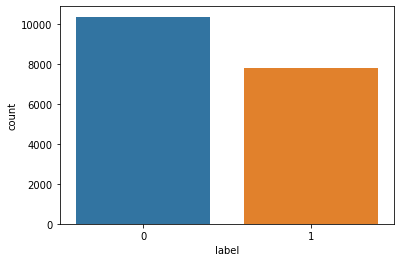

In [19]:
# Check Count of labels
sns.countplot(x='label',data=df)

Our Data is close to balance

Preliminary Training

In [20]:
X = df.drop(columns = ['title','author','label'])
y = df['label']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')
features=vectorizer.fit_transform(X.content)
features.shape
vectorizer.vocabulary_

{'house': 9601,
 'dem': 5365,
 'aide': 837,
 'didn': 5681,
 'comey': 4150,
 'letter': 11567,
 'jason': 10539,
 'chaffetz': 3546,
 'tweeted': 20567,
 'darrell': 5087,
 'lucus': 11924,
 'flynn': 7776,
 'hillary': 9367,
 'clinton': 3953,
 'big': 2319,
 'woman': 21893,
 'campus': 3212,
 'breitbart': 2818,
 'daniel': 5050,
 'truth': 20479,
 'fired': 7623,
 'consortiumnews': 4411,
 'com': 4131,
 '15': 76,
 'civilians': 3849,
 'killed': 11005,
 'single': 18244,
 'airstrike': 873,
 'identified': 9771,
 'jessica': 10603,
 'purkiss': 15774,
 'iranian': 10375,
 'jailed': 10504,
 'fictional': 7525,
 'unpublished': 20851,
 'story': 19088,
 'stoned': 19061,
 'death': 5159,
 'adultery': 710,
 'howard': 9610,
 'portnoy': 15199,
 'jackie': 10480,
 'mason': 12333,
 'hollywood': 9473,
 'love': 11893,
 'trump': 20448,
 'bombed': 2602,
 'north': 13674,
 'korea': 11148,
 'lack': 11249,
 'trans': 20277,
 'bathrooms': 2055,
 'exclusive': 7057,
 'video': 21195,
 'nussbaum': 13768,
 'benoît': 2229,
 'hamon': 89

In [22]:
features.shape

(18121, 22588)

Split the dataset into training and testing sets.

*   List item

*   List item

*   List item
*   List item



> Indented block

> Indented block




*   List item


*   List item



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
# let's do Train Test Split of Our Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.2,random_state=42,stratify=y)

In [25]:
# # Now Let's Do Vectorization of Transformed Content Using Bag of Words Technique
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# # create object of CountVectorizer
# cf = CountVectorizer(max_features=5000)

In [26]:
# # Convert X_train and Y_train into Vectors
# X_trf =  cf.fit_transform(X).toarray()
# X_train = cf.fit_transform(X_train).toarray()
# X_test = cf.transform(X_test).toarray()

Model Building

In [27]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [28]:
# Function to Find Best Model and Parameters of that Model.
def check_model(X,y): 
    algos = {
            'lgr':{

            'model':LogisticRegression()
,
            'params':{
                'C':[0.1,0.01,1,0.5,2,10,20]
            }
        },         
       
        'mnb':{
            'model':MultinomialNB(),
            'params':{
                
            }
        },
        'bnb':{
            'model':BernoulliNB(),
            'params':{
            
            }
        },
        'gnb':{
            'model':GaussianNB(),
            'params':{
            
            }
        },
    }
    
    score = []
    
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
        
    return pd.DataFrame(score)

In [29]:
# Let's Evaluate Model
def model_evaluation(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train,train_pred)
    test_acc = accuracy_score(y_test,test_pred)
    
    train_score = pd.Series({'accuracy_score':accuracy_score(y_train,train_pred),'precision_score':precision_score(y_train,train_pred)})
    test_score = pd.Series({'accuracy_score':accuracy_score(y_test,test_pred),'precision_score':precision_score(y_test,test_pred)})
    scorecard = pd.concat([train_score,test_score],axis=1)
    
    scorecard.columns = ['Train_data','Test_data']
    
    return scorecard

In [30]:
# Model Evaluation of Logistic Regression
model_evaluation(LogisticRegression(C=10),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,1.0,0.994759
precision_score,1.0,0.992303


In [31]:
# Model Evaluation of LogisticRegression
model_evaluation(MultinomialNB(),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.991584,0.975724
precision_score,0.998363,0.993935


In [32]:
model_evaluation(BernoulliNB(),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.993791,0.985379
precision_score,0.994667,0.988925


In [33]:
model_evaluation(GaussianNB(),X_train.toarray(),X_test.toarray(),y_train,y_test)

,Train_data,Test_data
accuracy_score,0.971509,0.867586
precision_score,0.937660,0.812209


Logistic Regression is Giving us Best result out of all the model. So, we are going to use Logistic Regression here

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix =confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[2059   12]
 [   7 1547]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2071
           1       0.99      1.00      0.99      1554

    accuracy                           0.99      3625
   macro avg       0.99      0.99      0.99      3625
weighted avg       0.99      0.99      0.99      3625

